In [22]:
import pandas as pd
from pathlib import Path

# 1. Define the repo root and path to your millage table
ROOT = Path().resolve().parents[1]  
MILLAGE_FP = ROOT / 'data' / 'Township_Millage_Table.csv'
OUTPUT_DIR = ROOT / 'outputs' / 'plots'

In [23]:
# 2. Load & clean
df = (
    pd.read_csv(MILLAGE_FP)
      .rename(columns={'TaxYear':'Year', 'FireRate':'Effective_Rate'})
)

# 3. Keep only the triennial years
years = [2014, 2017, 2020, 2023]
df = df[df['Year'].isin(years)].copy()

# 4. Compute municipality‐level averages
avg_by_muni = (
    df
    .groupby(['Municipality', 'Year'])['Effective_Rate']
    .mean()
    .reset_index(name='avg_fire_rate')
)

# 5. Compute the global average by year
global_avg = (
    avg_by_muni
    .groupby('Year')['avg_fire_rate']
    .mean()
    .reset_index(name='global_avg_fire_rate')
    .sort_values('Year')
)

# 6. Calculate triennial percent changes
global_avg['pct_change_global_fire_rate'] = (
    global_avg['global_avg_fire_rate']
    .pct_change()
    * 100
)

# 7. Compute the **average** of those percent changes
avg_pct_change = global_avg['pct_change_global_fire_rate'].mean(skipna=True)

# 8. Display result
print(global_avg)
print(f"\nAverage triennial percent change in global fire rate: {avg_pct_change:.2f}%")

   Year  global_avg_fire_rate  pct_change_global_fire_rate
0  2014             10.476714                          NaN
1  2017              9.001482                   -14.081060
2  2020              7.890465                   -12.342601
3  2023              8.192909                     3.833031

Average triennial percent change in global fire rate: -7.53%


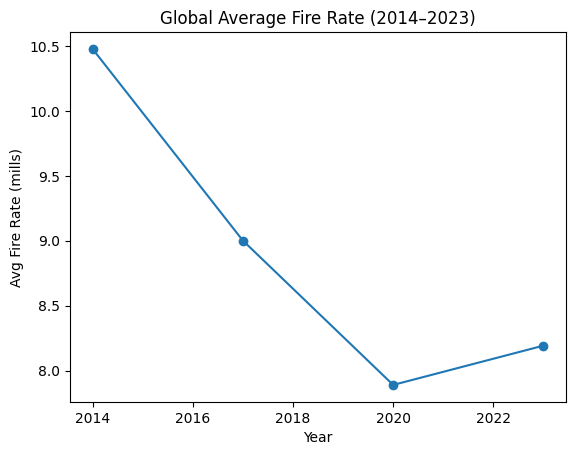

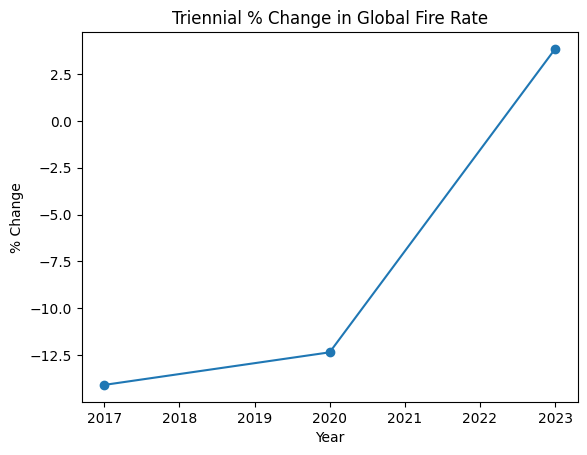

In [24]:
import matplotlib.pyplot as plt

# Global avg fire rate
fig, ax = plt.subplots()
ax.plot(global_avg['Year'], global_avg['global_avg_fire_rate'], marker='o')
ax.set_title('Global Average Fire Rate (2014–2023)')
ax.set_xlabel('Year')
ax.set_ylabel('Avg Fire Rate (mills)')
fig.savefig(OUTPUT_DIR / 'global_avg_fire_rate.png', dpi=300, bbox_inches='tight')
plt.show()

# Triennial % change in global fire rate
fig, ax = plt.subplots()
ax.plot(global_avg['Year'], global_avg['pct_change_global_fire_rate'], marker='o')
ax.set_title('Triennial % Change in Global Fire Rate')
ax.set_xlabel('Year')
ax.set_ylabel('% Change')
fig.savefig(OUTPUT_DIR / 'pct_change_global_fire_rate.png', dpi=300, bbox_inches='tight')
plt.show()